# M2: Basic Graphing Assignment
Jason Merten

In [418]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np 
print(os.getcwd())

c:\Users\jmert\Documents\W&M\BUAD5112\M2


## Data
### OpiodsVA.csv

In [2]:
df1 = pd.read_csv('OpidsVA.csv')
df1.rename(columns={'FFHO-Rate':'FFHO','FPOO-Rate':'FPOO','HIV-Rate':'HIV'},inplace=True)
df1.head()

,FIPSCode,CountyName,FFHO,FPOO,HIV,MedianHouseholdIncome
0,51001,Accomack,12.1,12.1,3.0,39040
1,51003,Albemarle,0.9,0.9,2.8,73132
2,51005,Alleghany,6.4,12.8,6.4,47037
3,51007,Amelia,7.7,0.0,7.7,56172
4,51009,Amherst,3.2,6.3,6.3,46497


- Do opioid overdoes tend to be associated with less affluent areas—that is, areas where families have lower incomes?

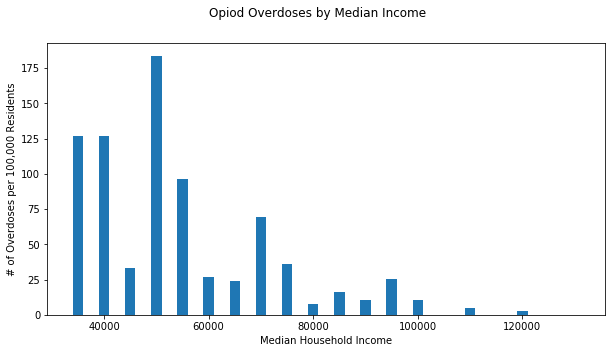

In [358]:
x = list(range(35000,135000,5000))
freq = [df1.loc[df1.MedianHouseholdIncome <= x[i]]['FPOO'].sum() for i in range(0,len(x))]
freq[1:21] = [freq[i]-freq[i-1] for i in range (1,len(freq))]

fig,ax = plt.subplots()
fig.set_size_inches(10,5)

# A bar graph is best used to represent the number of overdoses based on household income.  A scatterplot could have also been used but looks too busy.
ax.bar(x=x,height=freq,width=2000)

# Labels
ax.set_title('Opiod Overdoses by Median Income')
ax.xaxis.set_label_text('Median Household Income')
ax.yaxis.set_label_text('# of Overdoses per 100,000 Residents')

plt.show()

- Some people who start with opioid addictions are reported to transition to heroin use. What is the relationship in Virginia counties between opioid overdoses and heroin
overdoses? 

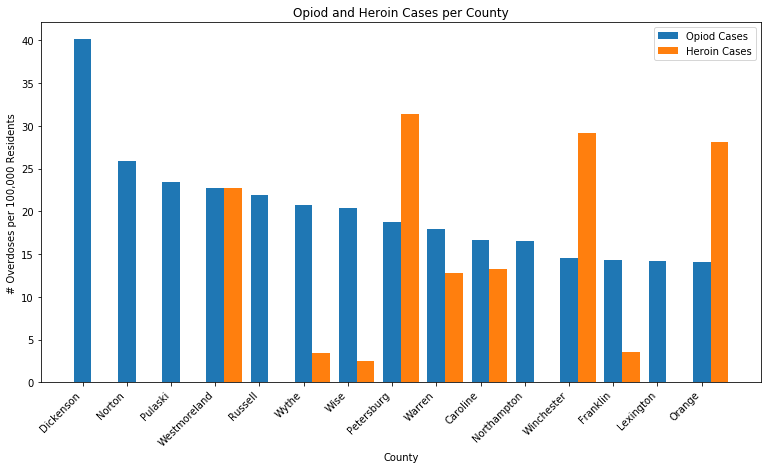

In [417]:
data = df1[['CountyName','FPOO','FFHO']].sort_values(by='FPOO',ascending=False)

fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
X = np.arange(15)

# Using a bar graph and pairing the data from the FPOO and FFHO data fields for each county (sorted by FPOO), we can see that there isn't a strong correlation between the two.
ax.bar(X + 0,height=data.FPOO[0:15],width=.4)
ax.bar(X + .4,height=data.FFHO[0:15],width=.4)

# Labels, ticks, and legend
ax.set_title('Opiod and Heroin Cases per County')
ax.set_ylabel('# Overdoses per 100,000 Residents')
ax.set_xlabel('County')
ax.set_xticks(range(0,15))
ax.set_xticklabels(data.CountyName[0:15],rotation=45,ha='right')
ax.legend(labels=['Opiod Cases','Heroin Cases'])

plt.draw()


### presidents.csv

In [329]:
df2 = pd.read_csv('presidents.csv')
df2.head()

,Name,Location,State
0,George Washington,Westmoreland County,Virginia
1,John Adams,Braintree,Massachusetts
2,Thomas Jefferson,Shadwell,Virginia
3,James Madison,Port Conway,Virginia
4,James Monroe,Monroe Hall,Virginia


Question:
- Which states are associated with the greatest number of United States presidents in terms of the presidents’ birthplaces?


In [341]:
data2 = df2.groupby('State').count().sort_values('Location',ascending=False)

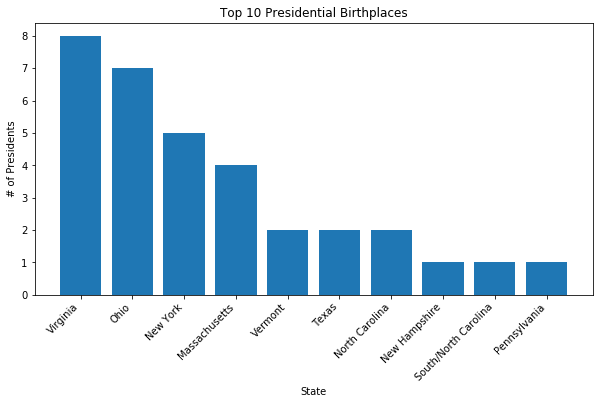

In [359]:
# data2 = df2.groupby('State')
fig,ax = plt.subplots()
fig.set_size_inches(10,5)

# A bar plot is the best way to show categorical totals.  Even better when the data is sorted.
ax.bar(data2.index[0:10],data2.Location[0:10])

# Labels
ax.set_title('Top 10 Presidential Birthplaces')
ax.set_ylabel('# of Presidents')
ax.set_xlabel('State')
ax.set_xticklabels(data2.index[0:10],rotation=45,ha='right')

plt.draw()

### TOTALNSA.csv

In [398]:
df3 = pd.read_csv('TOTALNSA.csv')
df3.head()

,DATE,TOTALNSA
0,1976-01-01,885.2
1,1976-02-01,994.7
2,1976-03-01,1243.6
3,1976-04-01,1191.2
4,1976-05-01,1203.2


Question:
- How have vehicle sales in the United States varied over time?


Text(0.5, 0, 'Fiscal Years')

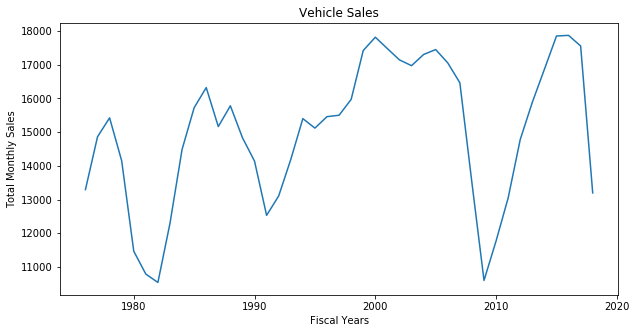

In [412]:
df3.DATE = pd.to_datetime(df3.DATE)  # convert DATE column to datetime format
totals = df3.groupby(df3.DATE.dt.year).sum()  # group by year

fig,ax = plt.subplots()
fig.set_size_inches(10,5)

# Because this is time series data, a line graph is the best choice to show change over time
ax.plot(totals.index,totals.TOTALNSA)

# Labels and ticks
ax.set_title('Vehicle Sales')
ax.set_ylabel('Total Monthly Sales')
ax.set_xlabel('Fiscal Years')